<h1 align="center">Final Report - Lập Trình Python cho Máy Học</h1>
<h1 align="center">Cardiovascular Disease use Decision Tree Classifier</h1>

Link Dataset: [Cardiovascular Disease Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

#Download Dataset

In [ ]:
!gdown https://drive.google.com/uc?id=1bqzVMJrtqK46QH-Xoht7TkbDNBhvnG2k

Downloading...
From: https://drive.google.com/uc?id=1bqzVMJrtqK46QH-Xoht7TkbDNBhvnG2k
To: /content/cardio.csv
100% 2.94M/2.94M [00:00<00:00, 94.4MB/s]


In [ ]:
data_url = './cardio.csv'

# Import Libary

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import *
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Loading Dataset

In [ ]:
data = pd.read_csv(data_url, sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


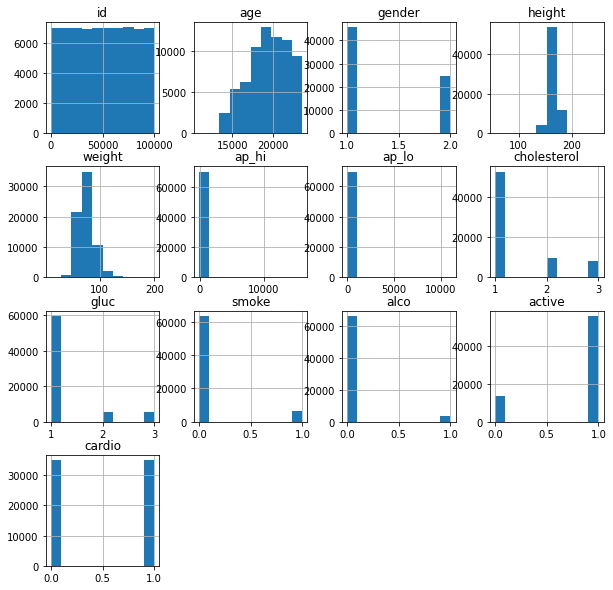

In [ ]:
data.hist(figsize=(10,10));

In [ ]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

In [ ]:
df = pd.DataFrame(data)
df = df.drop(['id'], axis=1) # Bỏ cột id

## Remove dublicated rows

In [ ]:
print("{} rows are same".format(df.duplicated().sum()))

24 rows are same


In [ ]:
df.drop_duplicates(inplace= True)
print("{} rows are same".format(df.duplicated().sum()))

0 rows are same


## Add BMI Value to dataset

In [ ]:
df["bmi"] = (df["weight"] / (df["height"] / 100)**2).round(1)
df.drop(["weight","height"],axis = 1,inplace = True)

df = df[(df["bmi"]>10) & (df["bmi"]<100)]

## Label Binarizer

In [ ]:
lb = preprocessing.LabelBinarizer()

df_cholesterol = df['cholesterol']
df_gluc = df['gluc']

df_cholesterol = lb.fit_transform(df_cholesterol)
df_gluc = lb.fit_transform(df_cholesterol)

df = df.drop(["cholesterol", "gluc"], axis=1)

## Final Data

In [ ]:
df['age'] =  df['age'] // 365
df['gender'] =  df['gender'] % 2

y_data = df['cardio']
X_data = df.drop(['cardio'], axis=1)

In [ ]:
X_data = np.hstack([X_data, df_cholesterol])
X_data = np.hstack([X_data, df_gluc])

In [ ]:
y_data = y_data.to_numpy()

# Tranning and Evaluate Model

## Normal

In [ ]:
# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66     12509
           1       0.60      0.66      0.63     10572

    accuracy                           0.65     23081
   macro avg       0.65      0.65      0.65     23081
weighted avg       0.65      0.65      0.65     23081



## K-Fold Cross Validation

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
accuracy_list = []

for train, test in kfold.split(X_data, y_data):
    clf = DecisionTreeClassifier()
    X_train, X_test = X_data[train], X_data[test];
    y_train, y_test = y_data[train], y_data[test]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

print("Accuracy: ", np.mean(accuracy_list) * 100)

Accuracy:  63.97535837065329


# Hyperparameter Tuning for Decision Tree

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)

parameters = {
    'clf__max_depth': [2, 3, 4],
    'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_split': [2, 4], 
    'clf__max_leaf_nodes': [8, 16, 32],   
}

pipeline = Pipeline(steps=[("clf", DecisionTreeClassifier())])

tree_grid = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring='accuracy')
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             n_jobs=12,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [2, 3, 4],
                         'clf__max_leaf_nodes': [8, 16, 32],
                         'clf__min_samples_split': [2, 4]},
             scoring='accuracy')

In [ ]:
y_pred = tree_grid.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73     11821
           1       0.72      0.74      0.73     11260

    accuracy                           0.73     23081
   macro avg       0.73      0.73      0.73     23081
weighted avg       0.73      0.73      0.73     23081



In [ ]:
tree_grid.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 4,
 'clf__max_leaf_nodes': 16,
 'clf__min_samples_split': 2}